In [21]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
import torchvision 
from tqdm import tqdm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

device = 'cpu'
if torch.cuda.is_available():
  device = 'cuda'
  torch.cuda.manual_seed_all(1)

# Preprocessing

In [22]:
!mkdir specgrams
!mkdir specgrams/TRAIN
!mkdir specgrams/TRAIN/Cough
!mkdir specgrams/TRAIN/No_Cough
!mkdir specgrams/TEST
!mkdir specgrams/TEST/Cough
!mkdir specgrams/TEST/No_Cough

mkdir: specgrams: File exists
mkdir: specgrams/TRAIN: File exists
mkdir: specgrams/TRAIN/Cough: File exists
mkdir: specgrams/TRAIN/No_Cough: File exists
mkdir: specgrams/TEST: File exists
mkdir: specgrams/TEST/Cough: File exists
mkdir: specgrams/TEST/No_Cough: File exists


In [33]:
def wave_to_specgram(folder_path):    
    file_list = os.listdir(folder_path)
    dataset = torch.empty(1)
    for file in file_list:
        if file != '.DS_Store':
            waveform, sample_rate = torchaudio.load(folder_path+'/'+file)
            specgram = torchaudio.transforms.Spectrogram()(waveform)
            specgram_resize = torchvision.transforms.Resize((217,217))(specgram)
            plt.figure(frameon=False)
            plt.axis('off')
            #We add epsilon = 1e-12 in order to be able to compute the logarithm and not get NaN values in the images
            specgram_resize += torch.ones(list(specgram_resize.shape))*1e-12
            plt.imshow(specgram_resize.log2()[0,:,:].numpy(), cmap='gray')
            plt.savefig('./specgrams/'+folder_path.split('/')[-2]+'/'+folder_path.split('/')[-1]+'/'+file.strip('.wav')+'.png', bbox_inches='tight',pad_inches=0)
            plt.close()

In [34]:
train_cough_dir = './Cough_dataset/Unlabeled_audio/TRAIN/Cough'
train_nocough_dir = './Cough_dataset/Unlabeled_audio/TRAIN/No_Cough'
test_cough_dir = './Cough_dataset/Unlabeled_audio/TEST/Cough'
test_nocough_dir = './Cough_dataset/Unlabeled_audio/TEST/No_Cough'

wave_to_specgram(train_cough_dir)
wave_to_specgram(train_nocough_dir)
wave_to_specgram(test_cough_dir)
wave_to_specgram(test_nocough_dir)

In [28]:
print('total training cough files:', len(os.listdir(train_cough_dir)))
print('total training nocough files:', len(os.listdir(train_nocough_dir)))
print('total validation cough files:', len(os.listdir(test_cough_dir)))
print('total validation nocough files:', len(os.listdir(test_nocough_dir)))

total training cough files: 360
total training nocough files: 302
total validation cough files: 155
total validation nocough files: 130


/home/elias/anaconda3/lib/python3.7/site-packages/torchvision/transforms/transforms.py:279: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


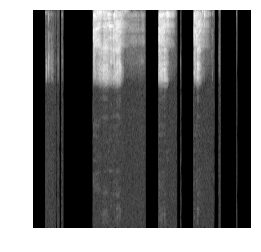

In [6]:
folder_path = train_cough_dir
file_list = os.listdir(folder_path)
file = file_list[5]
waveform, sample_rate = torchaudio.load(folder_path+'/'+file)
specgram = torchaudio.transforms.Spectrogram()(waveform)
specgram_resize = torchvision.transforms.Scale((224,224))(specgram)
plt.figure(frameon=False)
plt.axis('off')
#print(list(specgram_resize.shape[1:]))
#We add epsilon = 1e-12 in order to be able to compute the logarithm and not get NaN values in the images
specgram_resize += torch.ones(list(specgram_resize.shape))*1e-12
plt.imshow(specgram_resize.log2()[0,:,:].numpy(), cmap='gray')
plt.savefig('./specgrams/'+folder_path.split('/')[-2]+'/'+folder_path.split('/')[-1]+'/'+file.strip('.wav')+'.png')

In [7]:
torch.ones([10,10])

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])